In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
from scipy.fft import fft, ifft, fftfreq
from scipy.io.wavfile import write

## Import wav file and analyse the freq spectrum

In [13]:

# ==============================================

time_period = 0.1 # FFT time period (in seconds). Can comfortably process time frames from 0.05 seconds - 10 seconds

# ==============================================
root = '../assets/'
filename = 'fluteircam.wav'
# signal_original is a 1-D for 1-channel WAV file
fs_rate, signal_original = wavfile.read(root+filename)
total_time = int(np.floor(len(signal_original)/fs_rate))
sample_range = np.arange(0, total_time, time_period)
total_samples = len(sample_range)

print ("Frequency sampling: %d Hz" % fs_rate)
print(f"number of total freq: {signal_original.shape[0]} Hz")
print ("total time: %.2f s" % total_time)
print ("sample time period: ", time_period)
print ("total samples: ", total_samples)

Frequency sampling: 32000 Hz
number of total freq: 437920 Hz
total time: 13.00 s
sample time period:  0.1
total samples:  130


Because the sound pressure values are mapped to integer values that can range from $-2^{15}$ to $(2^{15})-1$. We can convert our sound array to floating point values ranging from $-1$ to $1$ as follows:

In [14]:
print(signal_original.dtype)
signal_original = signal_original / (2.**15)

int16


In [15]:
FFT_array, FFT_bucket_array = [], []
freq_array, freq_bucket_array = [], []
for i in sample_range:

    print ("Processing: %d / %d (%d%%)" % (i/time_period + 1, total_samples, (i/time_period + 1)*100/total_samples))

    sample_start = int(i*fs_rate) # the start sample freq
    sample_end = int((i+time_period)*fs_rate)  # the ending sample freq
    signal = signal_original[sample_start:sample_end]
    #print("Start sample freq, end sample freq: ", sample_start, sample_end)

    l_audio = len(signal.shape)  # dimensions (num of channels) of signal
    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]     # number of sampling points = time_period*fs_rate, such as 3200 heres

    secs = N / float(fs_rate)   # the sample time period, such as 3200/32000Hz = 0.1s here
    Ts = 1.0/fs_rate   # sampling interval in time
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

    # ========================== TTF ==========================
    FFT = abs(fft(signal)) # Get the FFT 
    FFT_side = FFT[range(int(N/2))] # one side FFT range, abondon the second half
    freqs = scipy.fftpack.fftfreq(N, Ts) # fftfreq(num of sampling points, sampling interval)
    fft_freqs_side = np.array(freqs[range(int(N/2))]) # one side frequency, abondon the second half 

    # Reduce to 0-5000 Hz
    bucket_size = 5
    buckets = 16

    FFT_side_bucket = FFT_side[0:bucket_size*buckets]
    fft_freqs_side_bucket = fft_freqs_side[0:bucket_size*buckets]
    
    # Combine frequencies into buckets
    FFT_side_bucket = np.array([int(sum(FFT_side_bucket[current: current+bucket_size])) for current in range(0, len(FFT_side_bucket), bucket_size)])
    fft_freqs_side_bucket = np.array([int(sum(fft_freqs_side_bucket[current: current+bucket_size])) for current in range(0, len(fft_freqs_side_bucket), bucket_size)])
    
    # FFT Normalize (0-1)
    FFT_side_norm = FFT_side / max(FFT_side) if (max(FFT_side) != 0) else FFT_side
    FFT_side_bucket_norm = FFT_side_bucket / max(FFT_side_bucket) if (max(FFT_side_bucket) != 0) else FFT_side_bucket
        
    # Append to output array
    FFT_array.append(FFT_side_norm)
    freq_array.append(fft_freqs_side)
    FFT_bucket_array.append(FFT_side_bucket_norm)
    freq_bucket_array.append(fft_freqs_side_bucket)

Processing: 1 / 130 (0%)
Processing: 2 / 130 (1%)
Processing: 3 / 130 (2%)
Processing: 4 / 130 (3%)
Processing: 5 / 130 (3%)
Processing: 6 / 130 (4%)
Processing: 7 / 130 (5%)
Processing: 8 / 130 (6%)
Processing: 9 / 130 (6%)


<ipython-input-15-e295fc3ef176>:19: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray


Processing: 10 / 130 (7%)
Processing: 11 / 130 (8%)
Processing: 12 / 130 (9%)
Processing: 13 / 130 (10%)
Processing: 14 / 130 (10%)
Processing: 15 / 130 (11%)
Processing: 16 / 130 (12%)
Processing: 17 / 130 (13%)
Processing: 18 / 130 (13%)
Processing: 19 / 130 (14%)
Processing: 20 / 130 (15%)
Processing: 21 / 130 (16%)
Processing: 22 / 130 (16%)
Processing: 23 / 130 (17%)
Processing: 24 / 130 (18%)
Processing: 25 / 130 (19%)
Processing: 26 / 130 (20%)
Processing: 27 / 130 (20%)
Processing: 28 / 130 (21%)
Processing: 29 / 130 (22%)
Processing: 30 / 130 (23%)
Processing: 31 / 130 (23%)
Processing: 32 / 130 (24%)
Processing: 33 / 130 (25%)
Processing: 34 / 130 (26%)
Processing: 35 / 130 (26%)
Processing: 36 / 130 (27%)
Processing: 37 / 130 (28%)
Processing: 38 / 130 (29%)
Processing: 39 / 130 (30%)
Processing: 40 / 130 (30%)
Processing: 41 / 130 (31%)
Processing: 42 / 130 (32%)
Processing: 43 / 130 (33%)
Processing: 43 / 130 (33%)
Processing: 45 / 130 (34%)
Processing: 46 / 130 (35%)
Proc

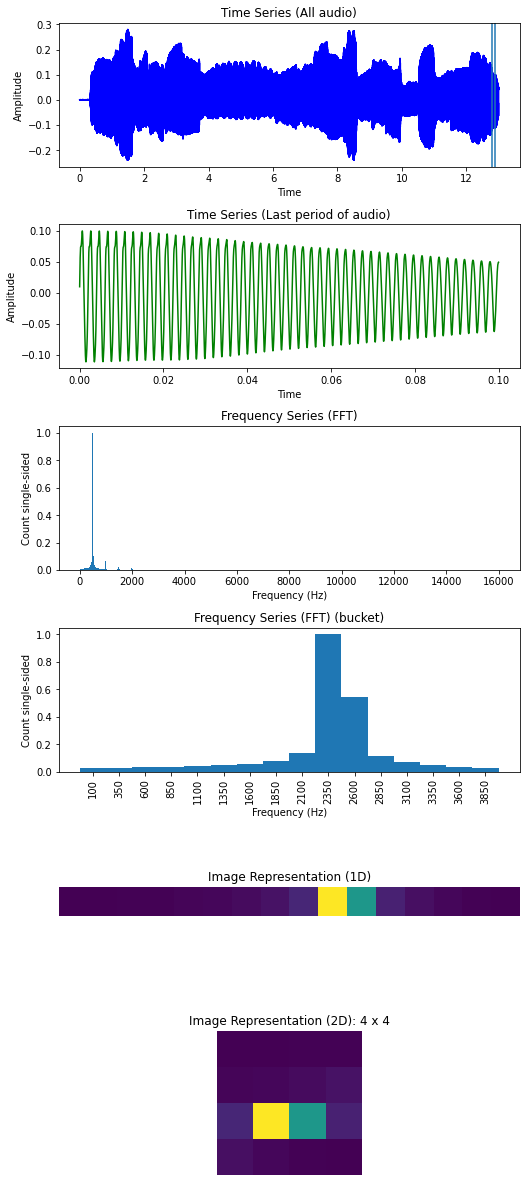

In [16]:
# Plotting a period of signal, here the last period of signal, e.g. [12.9s, 13.0s]

plt.figure(figsize=(8,20))

total_t = np.arange(0, total_time, 1.0/fs_rate)
plt.subplot(611)
plt.plot(total_t, signal_original[:len(total_t)], "b") # plotting the signal
plt.axvline(x=sample_range[-1], ymin=0, ymax=1)
plt.axvline(x=sample_range[-2], ymin=0, ymax=1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Series (All audio)')

plt.subplot(612)
plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Series (Last period of audio)')

plt.subplot(613)
diff = np.diff(fft_freqs_side)  # Calculate the n-th discrete difference
widths = np.hstack([diff, diff[-1]]) # Stack arrays in sequence horizontally (column wise).
plt.bar(fft_freqs_side, abs(FFT_side_norm), width=widths) # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.title('Frequency Series (FFT)')

plt.subplot(614)
diff = np.diff(fft_freqs_side_bucket)
widths = np.hstack([diff, diff[-1]])
plt.bar(fft_freqs_side_bucket, abs(FFT_side_bucket_norm), width=widths) # plotting the positive fft spectrum
plt.xticks(fft_freqs_side_bucket, fft_freqs_side_bucket, rotation='vertical')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.title('Frequency Series (FFT) (bucket)')

FFT_side_norm_line = FFT_side_bucket_norm.copy()
FFT_side_norm_line.resize( (1,buckets) )

plt.subplot(615)
plt.imshow(FFT_side_norm_line)
plt.axis('off')
plt.title('Image Representation (1D)')

width_img = int(np.sqrt(buckets))
height_img = int(np.ceil(buckets / int(np.sqrt(buckets))))
FFT_side_norm_rect = FFT_side_bucket_norm.copy()
FFT_side_norm_rect.resize( (width_img,height_img) )

plt.subplot(616)
plt.imshow(FFT_side_norm_rect)
plt.axis('off')
plt.title('Image Representation (2D): %d x %d' % (width_img,height_img))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [17]:
len(FFT_array), len(FFT_array[0])

(130, 1600)

In [18]:
x_steps, y_steps = [], []
for i in range(len(FFT_array)):
    max_freq = FFT_array[i].argmax()
    x_steps.append(time_period*i)
    y_steps.append(max_freq)

Text(0, 0.5, 'Frequency / Hz')

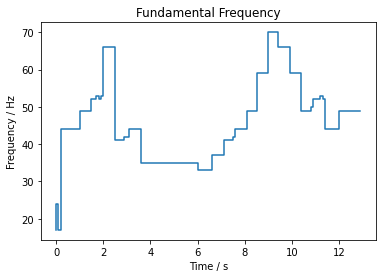

In [19]:
plt.step(x_steps, y_steps)
plt.title('Fundamental Frequency')
plt.xlabel('Time / s')
plt.ylabel('Frequency / Hz')